In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import LabelEncoder, StandardScaler
Le = LabelEncoder()
Ss = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import PrecisionRecallDisplay, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Analysis 

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
train.shape

(891, 12)

In [8]:
test.shape

(418, 11)

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Data Visualization

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

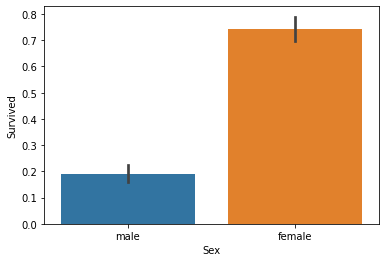

In [13]:
sns.barplot(x = 'Sex', y = "Survived", data = train)

Survival rate of women is more compared to Men

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

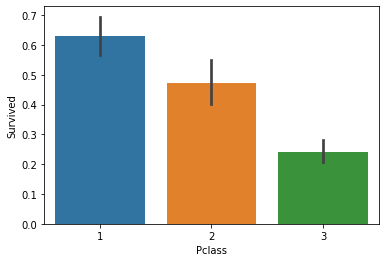

In [14]:
sns.barplot(x = 'Pclass', y = "Survived", data = train)

Survival rate is higher in Pclass1 compared to Pclass2 and Pclass3

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

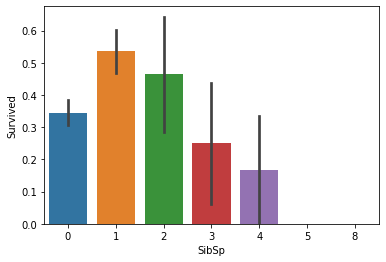

In [15]:
sns.barplot(x = 'SibSp', y = "Survived", data = train)

Survival rate is higher in Sibsp2 compared to others

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

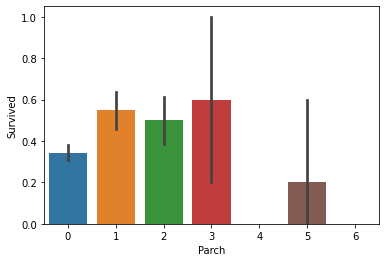

In [16]:
sns.barplot(x = 'Parch', y = "Survived", data = train)

Survival rate is higher in Parch3 compared to others

In [17]:
train["Age"] = pd.cut(train['Age'], bins = np.linspace(0, 80, 5))

In [18]:
test["Age"] = pd.cut(test['Age'], bins = np.linspace(0, 80, 5))

<AxesSubplot:xlabel='Age', ylabel='Survived'>

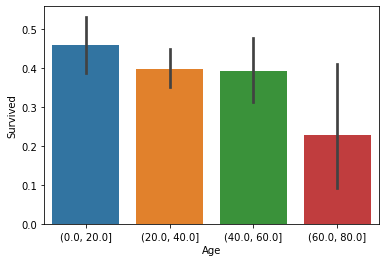

In [19]:
sns.barplot(x = "Age", y = "Survived", data = train)

# Data Cleaning

In [20]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,4,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Leinonen, Mr. Antti Gustaf",male,"(20.0, 40.0]",NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,385,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,NaN,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,NaN,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [21]:
#since more than 50% of data is missing. 
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [22]:
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [23]:
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

Now lets fill the columns with missing values

In [24]:
train[['Embarked']] = train[['Embarked']].apply(Le.fit_transform)

In [25]:
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])

In [26]:
test["Embarked"] = test["Embarked"].fillna(test["Embarked"].mode()[0])

In [27]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Embarked         0
dtype: int64

In [28]:
train["Age"] = train["Age"].fillna(train["Age"].mode()[0])

In [29]:
test["Age"] = test["Age"].fillna(test["Age"].mode()[0])

In [30]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [31]:
train_nd = train.select_dtypes(np.number)
train_cd = train.select_dtypes(object)
train_cd.head()

,Name,Sex
0,"Braund, Mr. Owen Harris",male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,"Heikkinen, Miss. Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,"Allen, Mr. William Henry",male


In [32]:
train_cd1 = train_cd.apply(Le.fit_transform)
train_cd1.head()

,Name,Sex
0,108,1
1,190,0
2,353,0
3,272,0
4,15,1


In [33]:
#train_nd1 = pd.DataFrame(Ss.fit_transform(train_nd), columns = train_nd.columns)

In [34]:
final_train_data = pd.concat([train_nd, train_cd1], axis = 1)

# Spliting the data

In [35]:
X = final_train_data.drop(['Survived','PassengerId'], axis = 1)
y = final_train_data['Survived']

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [37]:
X_train.head()

,Pclass,SibSp,Parch,Embarked,Name,Sex
140,3,0,2,0,99,0
439,2,0,0,2,447,1
817,2,1,1,0,504,1
378,3,0,0,0,85,1
491,3,0,0,2,871,1


# Choosing the Models

# Logistic Regression


In [38]:
from sklearn.linear_model import LogisticRegression

Lr = LogisticRegression()
Lr.fit(X_train, y_train)
y_pred = Lr.predict(X_test)
print("Logistic Regression train score:",Lr.score(X_train,y_train))
print("Logistic Regression test score:",Lr.score(X_test,y_test))

Logistic Regression train score: 0.7991573033707865
Logistic Regression test score: 0.8044692737430168


In [39]:
print("precision_score is: ", precision_score(y_test,y_pred, average = 'weighted'))
print("recall_score is :", recall_score(y_test,y_pred, average = 'weighted'))
print("accuracy_score is:     ", accuracy_score(y_test,y_pred))
ac1 = accuracy_score(y_test,y_pred)

precision_score is:  0.8032243131368064
recall_score is : 0.8044692737430168
accuracy_score is:      0.8044692737430168


# KNN or K-Nearest Neighbous

In [40]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
y_pred2 = KNN.predict(X_test)
print("KNN train score:",KNN.score(X_train,y_train))
print("KNN test score:",KNN.score(X_test,y_test))

KNN train score: 0.7345505617977528
KNN test score: 0.4860335195530726


In [41]:
print("precision_score is: ", precision_score(y_test,y_pred2, average = 'weighted'))
print("recall_score is :", recall_score(y_test,y_pred2, average = 'weighted'))
print("f1_score is:     ", f1_score(y_test,y_pred2,average='weighted'))
print("accuracy_score is:     ", accuracy_score(y_test,y_pred2))
ac2 = accuracy_score(y_test,y_pred2)

precision_score is:  0.4741990714366654
recall_score is : 0.4860335195530726
f1_score is:      0.4792361221058663
accuracy_score is:      0.4860335195530726


# Support Vector Machines


In [42]:
from sklearn.svm import SVC

SVC = SVC()
SVC.fit(X_train,y_train)
y_pred3 = SVC.predict(X_test)
print("SVC train score:",SVC.score(X_train,y_train))
print("SVC test score:",SVC.score(X_test,y_test))

SVC train score: 0.6165730337078652
SVC test score: 0.6145251396648045


In [43]:
print("precision_score is: ", precision_score(y_test,y_pred3, average = 'weighted'))
print("recall_score is :", recall_score(y_test,y_pred3, average = 'weighted'))
print("f1_score is:     ", f1_score(y_test,y_pred3,average='weighted'))
print("accuracy_score is:     ", accuracy_score(y_test,y_pred3))
ac3 =  accuracy_score(y_test,y_pred3)

precision_score is:  0.37764114728004744
recall_score is : 0.6145251396648045
f1_score is:      0.4678046045891245
accuracy_score is:      0.6145251396648045


# Navies Bayes 


In [44]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train,y_train)
y_pred4 = NB.predict(X_test)
print("NB train score:",NB.score(X_train,y_train))
print("NB test score:",NB.score(X_test,y_test))

NB train score: 0.7865168539325843
NB test score: 0.8044692737430168


In [45]:
print("precision_score is: ", precision_score(y_test,y_pred4, average = 'weighted'))
print("recall_score is :", recall_score(y_test,y_pred4, average = 'weighted'))
print("f1_score is:     ", f1_score(y_test,y_pred4,average='weighted'))
print("accuracy_score is:     ", accuracy_score(y_test,y_pred4))
ac4 = accuracy_score(y_test,y_pred4)

precision_score is:  0.8080282996484114
recall_score is : 0.8044692737430168
f1_score is:      0.8056140299871624
accuracy_score is:      0.8044692737430168


# Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(criterion='gini', splitter='best', 
      max_depth=5000, min_samples_split=2, min_samples_leaf=1, 
      min_weight_fraction_leaf=0.0, max_features=None, 
      random_state=None, max_leaf_nodes=None, 
      min_impurity_decrease=0, min_impurity_split=None, 
      class_weight=None, ccp_alpha=0)

DTC.fit(X_train,y_train)
y_pred5 = DTC.predict(X_test)
print("DTC train score:",DTC.score(X_train,y_train))
print("DTC test score:",DTC.score(X_test,y_test))

DTC train score: 1.0
DTC test score: 0.7653631284916201


In [47]:
print("precision_score is: ", precision_score(y_test,y_pred5, average = 'weighted'))
print("recall_score is :", recall_score(y_test,y_pred5, average = 'weighted'))
print("f1_score is:     ", f1_score(y_test,y_pred5,average='weighted'))
print("accuracy_score is:     ", accuracy_score(y_test,y_pred5))
ac5 = accuracy_score(y_test,y_pred5)

precision_score is:  0.7653631284916201
recall_score is : 0.7653631284916201
f1_score is:      0.7653631284916201
accuracy_score is:      0.7653631284916201


# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=None, 
                             min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                             max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0, 
                             min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                             random_state=None, verbose=0, warm_start=False, class_weight=None, 
                             ccp_alpha=0.0, max_samples=None)

RFC.fit(X_train,y_train)
y_pred6 = RFC.predict(X_test)
print("RFC train score:",RFC.score(X_train,y_train))
print("RFC test score:",RFC.score(X_test,y_test))

RFC train score: 1.0
RFC test score: 0.7486033519553073


In [49]:
print("precision_score is: ", precision_score(y_test,y_pred6, average = 'weighted'))
print("recall_score is :", recall_score(y_test,y_pred6, average = 'weighted'))
print("f1_score is:     ", f1_score(y_test,y_pred6,average='weighted'))
print("accuracy_score is:     ", accuracy_score(y_test,y_pred6))
ac6 =  accuracy_score(y_test,y_pred6)

precision_score is:  0.7527195990883143
recall_score is : 0.7486033519553073
f1_score is:      0.7500751814120659
accuracy_score is:      0.7486033519553073


# Bagging Classifier


In [50]:
from sklearn.ensemble import BaggingClassifier

BC = BaggingClassifier(base_estimator = DTC)
BC.fit(X_train,y_train)
y_pred7 = BC.predict(X_test)
print("BC train score:",BC.score(X_train,y_train))
print("BC test score:",BC.score(X_test,y_test))

BC train score: 0.9747191011235955
BC test score: 0.8044692737430168


In [51]:
print("precision_score is: ", precision_score(y_test,y_pred7, average = 'macro'))
print("recall_score is :", recall_score(y_test,y_pred7, average = 'macro'))
print("f1_score is:     ", f1_score(y_test,y_pred7,average='macro'))
print("accuracy_score is:     ", accuracy_score(y_test,y_pred7))
ac7 = accuracy_score(y_test,y_pred7)

precision_score is:  0.7939189189189189
recall_score is : 0.792292490118577
f1_score is:      0.7930772533606367
accuracy_score is:      0.8044692737430168


# Adaboost classifier

In [52]:
from sklearn.ensemble import AdaBoostClassifier

ADB = AdaBoostClassifier()
ADB.fit(X_train, y_train)
y_pred8 = ADB.predict(X_test)
print("ADB train score:",ADB.score(X_train,y_train))
print("ADB test score:",ADB.score(X_test,y_test))

ADB train score: 0.8216292134831461
ADB test score: 0.8044692737430168


In [53]:
print("precision_score is: ", precision_score(y_test,y_pred8, average = 'weighted'))
print("recall_score is :", recall_score(y_test,y_pred8, average = 'weighted'))
print("f1_score is:     ", f1_score(y_test,y_pred8,average='weighted'))
print("accuracy_score is:     ", accuracy_score(y_test,y_pred8))
ac8 = accuracy_score(y_test,y_pred8)

precision_score is:  0.8027803922759291
recall_score is : 0.8044692737430168
f1_score is:      0.8029664477767976
accuracy_score is:      0.8044692737430168


# Perceptron

In [54]:
from sklearn.linear_model import Perceptron
PR = Perceptron()
PR.fit(X_train,y_train)
y_pred9 = PR.predict(X_test)
print("PR train score:",PR.score(X_train,y_train))
print("PR test score:",PR.score(X_test,y_test))

PR train score: 0.6165730337078652
PR test score: 0.6145251396648045


In [55]:
print("accuracy_score is:     ", accuracy_score(y_test,y_pred9))
ac9 = accuracy_score(y_test,y_pred9)

accuracy_score is:      0.6145251396648045


# Gradient Boosting Classifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
y_pred10 = GBC.predict(X_test)
print("GBC train score:",GBC.score(X_train,y_train))
print("GBC test score:",GBC.score(X_test,y_test))

GBC train score: 0.8665730337078652
GBC test score: 0.8379888268156425


In [57]:
print("precision_score is: ", precision_score(y_test,y_pred10, average = 'weighted'))
print("recall_score is :", recall_score(y_test,y_pred10, average = 'weighted'))
print("f1_score is:     ", f1_score(y_test,y_pred10 ,average='weighted'))
print("accuracy_score is:     ", accuracy_score(y_test,y_pred10))
ac10 = accuracy_score(y_test,y_pred10)

precision_score is:  0.8370669697935873
recall_score is : 0.8379888268156425
f1_score is:      0.8361582536512363
accuracy_score is:      0.8379888268156425


# Stochastic Gradient Descent

In [58]:
from sklearn.linear_model import SGDClassifier

SGD = SGDClassifier()
SGD.fit(X_train,y_train)
y_pred11 = SGD.predict(X_test)
print("SGD train score:",SGD.score(X_train,y_train))
print("SGD test score:",SGD.score(X_test,y_test))

SGD train score: 0.3946629213483146
SGD test score: 0.39106145251396646


In [59]:
print("precision_score is: ", precision_score(y_test,y_pred11, average = 'weighted'))
print("recall_score is :", recall_score(y_test,y_pred11, average = 'weighted'))
print("f1_score is:     ", f1_score(y_test,y_pred11 ,average='weighted'))
print("accuracy_score is:     ", accuracy_score(y_test,y_pred11))
ac11 = accuracy_score(y_test,y_pred11)

precision_score is:  0.558616895209074
recall_score is : 0.39106145251396646
f1_score is:      0.2357309839444751
accuracy_score is:      0.39106145251396646


Comaparing Models with each other

In [60]:
Logistic Regression
KNN or k-Nearest Neighbors
Support Vector Machines
Naive Bayes classifier
Decision Tree
Random Forrest
BaggingClassifier
AdaBoostClassifier
Perceptron
Gradient Boosting Classifier
Stochastic Gradient Descent

SyntaxError: invalid syntax (<ipython-input-60-09552b41b9a2>, line 1)

In [61]:
Models = pd.DataFrame({
    'Model' : ['Logistic Regression','KNN or k-Nearest Neighbors','Support Vector Machines',
              'Naive Bayes classifier', 'Decision Tree', 'Random Forrest', 'BaggingClassifier',
              'AdaBoostClassifier','Perceptron','Gradient Boosting Classifier',
              'Stochastic Gradient Descent'],
    'Score' : [ac1,ac2,ac3,ac4,ac5,ac6,ac7,ac8,ac9,ac10,ac11]
})

Models.sort_values(by = 'Score', ascending = False)

,Model,Score
9,Gradient Boosting Classifier,0.837989
0,Logistic Regression,0.804469
3,Naive Bayes classifier,0.804469
6,BaggingClassifier,0.804469
7,AdaBoostClassifier,0.804469
4,Decision Tree,0.765363
5,Random Forrest,0.748603
2,Support Vector Machines,0.614525
8,Perceptron,0.614525
1,KNN or k-Nearest Neighbors,0.486034


# Voting Classifier

In [62]:
from sklearn.ensemble import VotingClassifier
VotingClassifierModel = VotingClassifier(estimators=[('Logistic model',Lr),('KNN',KNN),('Support Vector Machines',SVC),
                                                     ('Naive Bayes classifier',NB),('Decision Tree',DTC),('Random Forrest',RFC),
                                                     ('BaggingClassifier',BC),('AdaBoostClassifier',ADB),('Perceptron',PR),
                                                    ('Gradient Boosting Classifier',GBC), ('Stochastic Gradient Descent',SGD)],
voting='hard')
VotingClassifierModel.fit(X_test, y_test)

VotingClassifier(estimators=[('Logistic model', LogisticRegression()),
                             ('KNN', KNeighborsClassifier()),
                             ('Support Vector Machines', SVC()),
                             ('Naive Bayes classifier', GaussianNB()),
                             ('Decision Tree',
                              DecisionTreeClassifier(ccp_alpha=0,
                                                     max_depth=5000,
                                                     min_impurity_decrease=0)),
                             ('Random Forrest',
                              RandomForestClassifier(max_features='log2',
                                                     n_estimators=500,
                                                     n_jobs=-1)),
                             ('BaggingClassifier',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0,
                                                            

In [63]:
print('VotingClassifierModel Train Score is : ' , VotingClassifierModel.score(X_train, y_train))
print('VotingClassifierModel Test Score is : ' , VotingClassifierModel.score(X_test, y_test))

VotingClassifierModel Train Score is :  0.776685393258427
VotingClassifierModel Test Score is :  0.9106145251396648


In [64]:
y_pred12 = VotingClassifierModel.predict(X_test)
print('Predicted Value for VotingClassifierModel is : ' , y_pred12)

Predicted Value for VotingClassifierModel is :  [0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [65]:
print("precision_score is: ", precision_score(y_test,y_pred12, average = 'weighted'))
print("recall_score is :", recall_score(y_test,y_pred12, average = 'weighted'))
print("f1_score is:     ", f1_score(y_test,y_pred12 ,average='weighted'))
print("accuracy_score is:     ", accuracy_score(y_test,y_pred12))
ac12 = accuracy_score(y_test,y_pred12)

precision_score is:  0.921965061629866
recall_score is : 0.9106145251396648
f1_score is:      0.907783198622833
accuracy_score is:      0.9106145251396648


In [66]:
Models = pd.DataFrame({
    'Model' : ['Logistic Regression','KNN or k-Nearest Neighbors','Support Vector Machines',
              'Naive Bayes classifier', 'Decision Tree', 'Random Forrest', 'BaggingClassifier',
              'AdaBoostClassifier','Perceptron','Gradient Boosting Classifier',
              'Stochastic Gradient Descent','VotingClassifier'],
    'Score' : [ac1,ac2,ac3,ac4,ac5,ac6,ac7,ac8,ac9,ac10,ac11,ac12]
})

Models.sort_values(by = 'Score', ascending = False)

,Model,Score
11,VotingClassifier,0.910615
9,Gradient Boosting Classifier,0.837989
0,Logistic Regression,0.804469
3,Naive Bayes classifier,0.804469
6,BaggingClassifier,0.804469
7,AdaBoostClassifier,0.804469
4,Decision Tree,0.765363
5,Random Forrest,0.748603
2,Support Vector Machines,0.614525
8,Perceptron,0.614525
